In [1]:
from navigation.navigator import Navigator, NaiveNavigator
from navigation.arena_utils import *
from navigation.un_field import create_unit_vector_from_angle
from linear_algebra_2D.linalg import Vec2D

# Definindo funções auxiliares

In [2]:
from random import randint

def create_random_vector() -> Vec2D:
    # Cria um vetor aleatório dentro das dimensões da arena.
    return Vec2D(randint(0, MAX_W_SIZE), randint(0, MAX_H_SIZE))

In [3]:
import math

def rad2degree(theta: float):
    return theta * 180 / math.pi

In [4]:
from typing import List, Tuple

def run_iterative_univector(navigator, 
                            origin_pos: Vec2D, 
                            target_pos: Vec2D, 
                            obstacles: List[Vec2D],
                            step_size: float = 3, 
                            acceptance_radius: float = 4,
                            max_iter=500,
                            add_border_obst: bool = True) -> Tuple[Vec2D, Vec2D]:

    axis_origins = []
    axis = []

    i = 0
    origin_pos = origin_pos.copy()

    print(f"Origem: {origin_pos}, Destino: {target_pos}")

    while (origin_pos - target_pos).norm() > acceptance_radius:

        if i > max_iter: break

        theta = navigator.get_angle(
            origin_pos,
            target_pos,
            obstacles,
            add_border_obst=add_border_obst
        )

        axis_to_follow = create_unit_vector_from_angle(theta)

        axis_origins.append(origin_pos)
        axis.append(axis_to_follow)

        origin_pos += step_size * axis_to_follow

        i += 1
    
    print(f"Finalizado com {i} iterações. Angulo final: {rad2degree(theta)}")
    return axis_origins, axis

In [5]:
import matplotlib.pyplot as plt

def plot_trajectory(origin_pos: Vec2D,
                    target_pos: Vec2D,
                    obstacles: List[Vec2D],
                    axis_to_follow: List[Vec2D],
                    axis_origins: List[Vec2D],
                    plot_scale: float = 0.7) -> None:
    
    plt.figure(figsize=(15*plot_scale, 13*plot_scale), dpi=80)

    # Plota a origem e objetivo
    a = plt.scatter(
        [origin_pos[0], target_pos[0]],
        [origin_pos[1], target_pos[1]], 
        color=["b", "g"], s=200
    )

    # Desenhando contornos da arena
    rect = plt.Rectangle((0, 0), 150, 130, linewidth=2, edgecolor='r', facecolor='none')
    a.axes.add_patch(rect)

    # Desenhando obstáculos como círculos vermelhos
    # TODO: tamanho hardcoded, corrigir depois
    for ob in obstacles:
        circ = plt.Circle((ob[0], ob[1]), 3.5, color='r')
        a.axes.add_patch(circ)

    # Desenhando vetores
    plt.quiver(
        [vec[0] for vec in axis_origins],
        [vec[1] for vec in axis_origins],
        [vec[0] for vec in axis_to_follow],
        [vec[1] for vec in axis_to_follow],
        scale=100
    )

# Funções auxiliares para criar pontos dentro de seções

In [6]:
# Constantes auxiliares
BORDER_SIZE = 10

In [7]:
def create_vector_in_center_area() -> Vec2D:
    
    return Vec2D(randint(0, MAX_W_SIZE), randint(BORDER_SIZE, MAX_H_SIZE-BORDER_SIZE))

In [8]:
def create_vector_in_down_border() -> Vec2D:
    
    return Vec2D(randint(0, MAX_W_SIZE), randint(0, BORDER_SIZE))

In [9]:
def create_vector_in_up_border() -> Vec2D:
    
    return Vec2D(randint(0, MAX_W_SIZE), randint(MAX_H_SIZE-BORDER_SIZE, MAX_H_SIZE))

In [10]:
def create_vector_in_left_corners() -> Vec2D:
    
    up = randint(0,1)
    sqr_side = int(SQUARE_SIDE)

    if up:
        return Vec2D(randint(0, sqr_side), randint(130 - sqr_side, 130))
    else:
        return Vec2D(randint(0, sqr_side), randint(0, sqr_side))

In [11]:
def create_vector_in_right_corners() -> Vec2D:
    
    up = randint(0,1)
    sqr_side = int(SQUARE_SIDE)

    if up:
        return Vec2D(randint(150 - sqr_side, 150), randint(130 - sqr_side, 130))
    else:
        return Vec2D(randint(150 - sqr_side, 150), randint(0, sqr_side))

# Instanciando Navigator

In [12]:
team_side = TeamSide.LEFT

In [13]:
# navigator = Navigator(
#     team_side=team_side,
#     univector_parameters_path="data/univector_params_red_dragons.json",
# )

navigator = NaiveNavigator(
    team_side=team_side,
    univector_parameters_path="data/univector_params_red_dragons.json",
)

# Instanciando robô e obstáculos

In [14]:
n_obstacles = 2                                                     # Número de obstáculos a criar
origin_pos = create_random_vector()                                 # Origem em um ponto aleatório
obstacles = [create_random_vector() for _ in range(n_obstacles)]    # Criando obstáculos aleatórios

# Alvo no centro da arena

Neste caso o robo deve se aproximar à posição alvo alinhado em relação ao gol adversário.

Origem: Vec2(43, 33), Destino: Vec2(129, 65)
Finalizado com 31 iterações. Angulo final: 0.28729788986062443


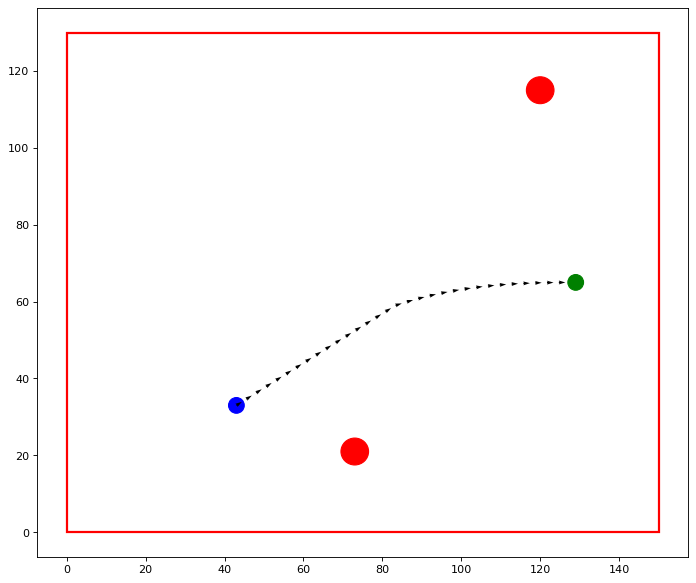

In [15]:
target_pos = create_vector_in_center_area()
axis_origins, axis_to_follow = run_iterative_univector(navigator, origin_pos, target_pos, obstacles)
plot_trajectory(origin_pos, target_pos, obstacles, axis_to_follow, axis_origins)

# Alvo na borda inferior

Origem: Vec2(43, 33), Destino: Vec2(80, 2)
Finalizado com 18 iterações. Angulo final: 33.352665116241305


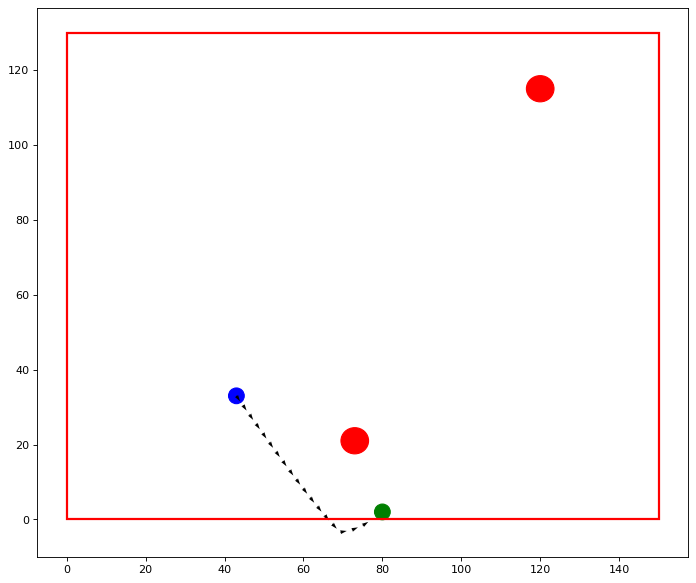

In [16]:
target_pos = create_vector_in_down_border()
axis_origins, axis_to_follow = run_iterative_univector(navigator, origin_pos, target_pos, obstacles, add_border_obst=False)
plot_trajectory(origin_pos, target_pos, obstacles, axis_to_follow, axis_origins)

# Alvo na borda superior

Origem: Vec2(43, 33), Destino: Vec2(52, 125)
Finalizado com 32 iterações. Angulo final: -16.586805023696105


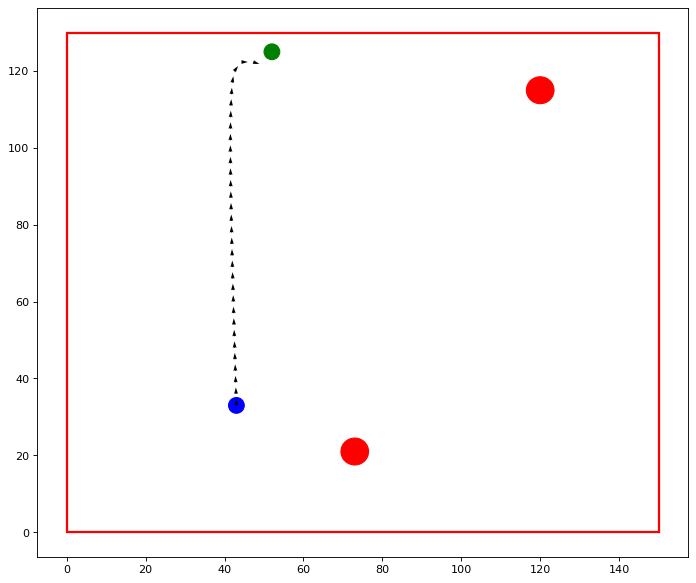

In [17]:
target_pos = create_vector_in_up_border()
axis_origins, axis_to_follow = run_iterative_univector(navigator, origin_pos, target_pos, obstacles)
plot_trajectory(origin_pos, target_pos, obstacles, axis_to_follow, axis_origins)

# Alvo nos cantos esquerdos

Origem: Vec2(43, 33), Destino: Vec2(4, 121)
Finalizado com 34 iterações. Angulo final: -2.2237309633267572


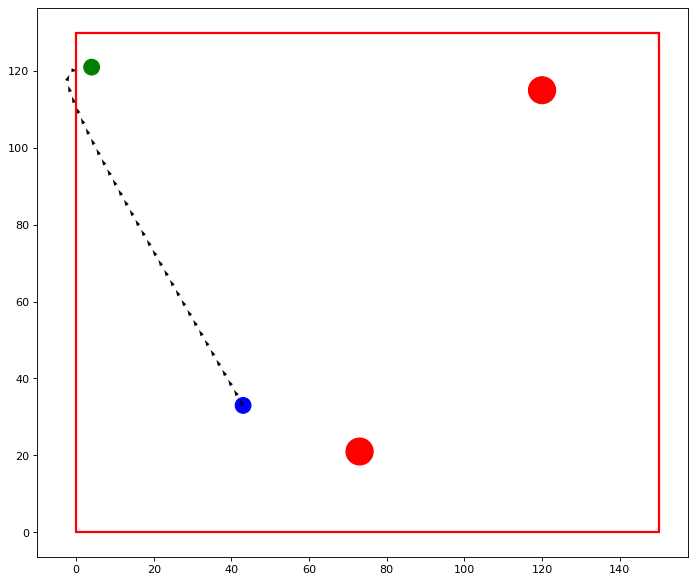

In [18]:
target_pos = create_vector_in_left_corners()
axis_origins, axis_to_follow = run_iterative_univector(navigator, origin_pos, target_pos, obstacles)
plot_trajectory(origin_pos, target_pos, obstacles, axis_to_follow, axis_origins)

# Alvos nos cantos direitos

Origem: Vec2(43, 33), Destino: Vec2(138, 117)
Finalizado com 43 iterações. Angulo final: 40.38796571519307


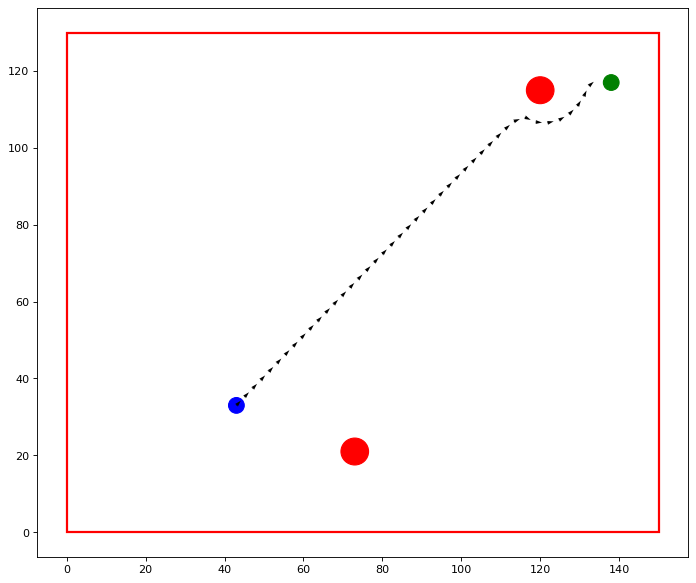

In [19]:
target_pos = create_vector_in_right_corners() 
axis_origins, axis_to_follow = run_iterative_univector(navigator, origin_pos, target_pos, obstacles)
plot_trajectory(origin_pos, target_pos, obstacles, axis_to_follow, axis_origins)

# Posições customizáveis

In [ ]:
# TODO: Utilizando uma gambiarra para usar um raio customizado para os "obstáculos borda"
# DMIN_BORDER aparentemente precisa ser < 1 para não ficar muito feio 
# Talvez customizar melhor os outros parâmetros do univector para deixar a "barriga" maior

Origem: Vec2(50, 50), Destino: Vec2(40, 7)
Finalizado com 17 iterações. Angulo final: 5.0023358566677185
Origem: Vec2(50, 50), Destino: Vec2(40, 7)
Finalizado com 17 iterações. Angulo final: 10.931004473697632


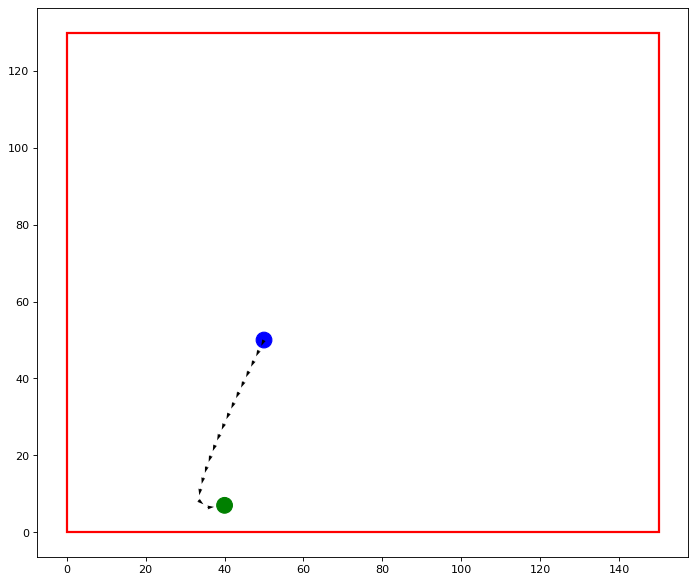

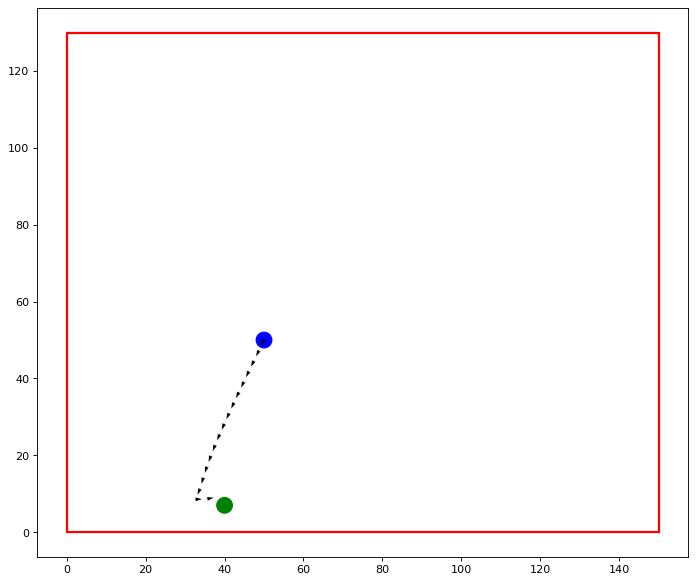

In [28]:
origin_pos = Vec2D(50, 50)
target_pos = Vec2D(40, 7)
obstacles = [] # Removendo obstáculos para facilitar a visualização
axis_origins, axis_to_follow = run_iterative_univector(navigator, origin_pos, target_pos, obstacles, add_border_obst=False)
plot_trajectory(origin_pos, target_pos, obstacles, axis_to_follow, axis_origins)

axis_origins, axis_to_follow = run_iterative_univector(navigator, origin_pos, target_pos, obstacles, add_border_obst=True)
plot_trajectory(origin_pos, target_pos, obstacles, axis_to_follow, axis_origins)